# DATA SOURCE - Kaggle

# EDA of Zomato Data

In [2]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
country=pd.read_excel('Country-Code.xlsx')
country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [5]:
df=pd.merge(df,country,on="Country Code",how="left")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [6]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [7]:
df.tail(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [11]:
df.dropna(subset = ['Cuisines'], inplace=True)

In [12]:
def cat_num(data):
    numerical_columns = data.select_dtypes(include=['int','float']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    return categorical_columns, numerical_columns
cat,num= cat_num(df)

In [13]:
cat

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text',
 'Country']

In [14]:
num

['Restaurant ID',
 'Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

In [15]:
countries= list(df["Country"])
countries_counts=Counter(countries)

frequency_df = pd.DataFrame({'Country':countries_counts.keys(),'Frequency':countries_counts.values()}).sort_values(by='Frequency', ascending=False)

top_3_Countries=frequency_df.head(3)

frequency_df

,Country,Frequency
7,India,8652
2,United States,425
10,United Kingdom,80
1,Brazil,60
6,UAE,60
12,South Africa,60
9,New Zealand,40
14,Turkey,34
3,Australia,24
0,Phillipines,22


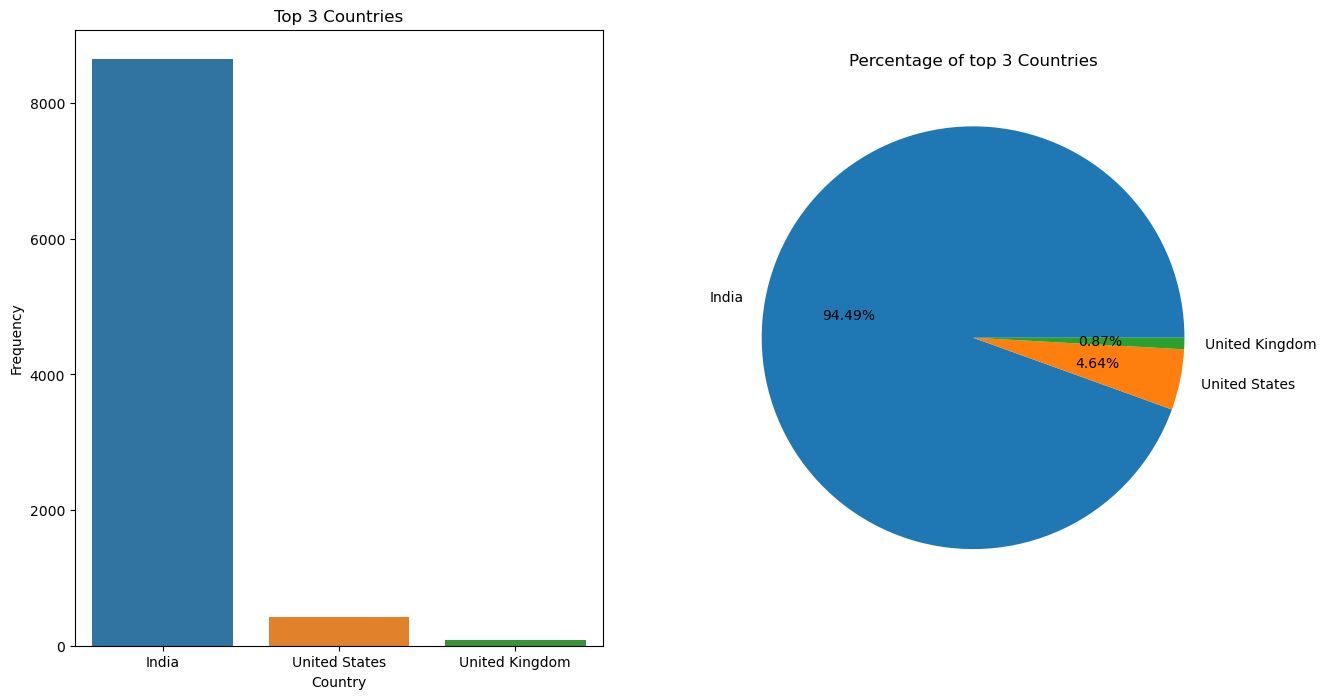

In [16]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
ax[0].set_title('Top 3 Countries')
ax[1].set_title('Percentage of top 3 Countries')
count=list(top_3_Countries['Frequency'])
label=list(top_3_Countries['Country'])
plt.pie(count,labels=label,autopct='%0.2f%%')
sns.barplot(x=top_3_Countries['Country'],y=top_3_Countries['Frequency'],ax=ax[0])
plt.show()

# Observation :-

###   India, United states, United Kngdom are top 3 countries having higest         frequency of orders

# Countries with their respective currencies

In [17]:
df.groupby(['Currency','Country']).size().reset_index()

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,425
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


### We can see that dollar is the cureency that is used more than other cureencies

# COUNTRY AND AVERAGE COST

In [18]:
df.groupby(['Average Cost for two','Country']).size().reset_index()

,Average Cost for two,Country,0
0,0,India,9
1,0,United States,6
2,7,Australia,4
3,10,United Kingdom,1
4,10,United States,124
...,...,...,...
295,300000,Indonesia,2
296,350000,Indonesia,1
297,450000,Indonesia,1
298,500000,Indonesia,1


<Axes: xlabel='Country', ylabel='Average Cost for two'>

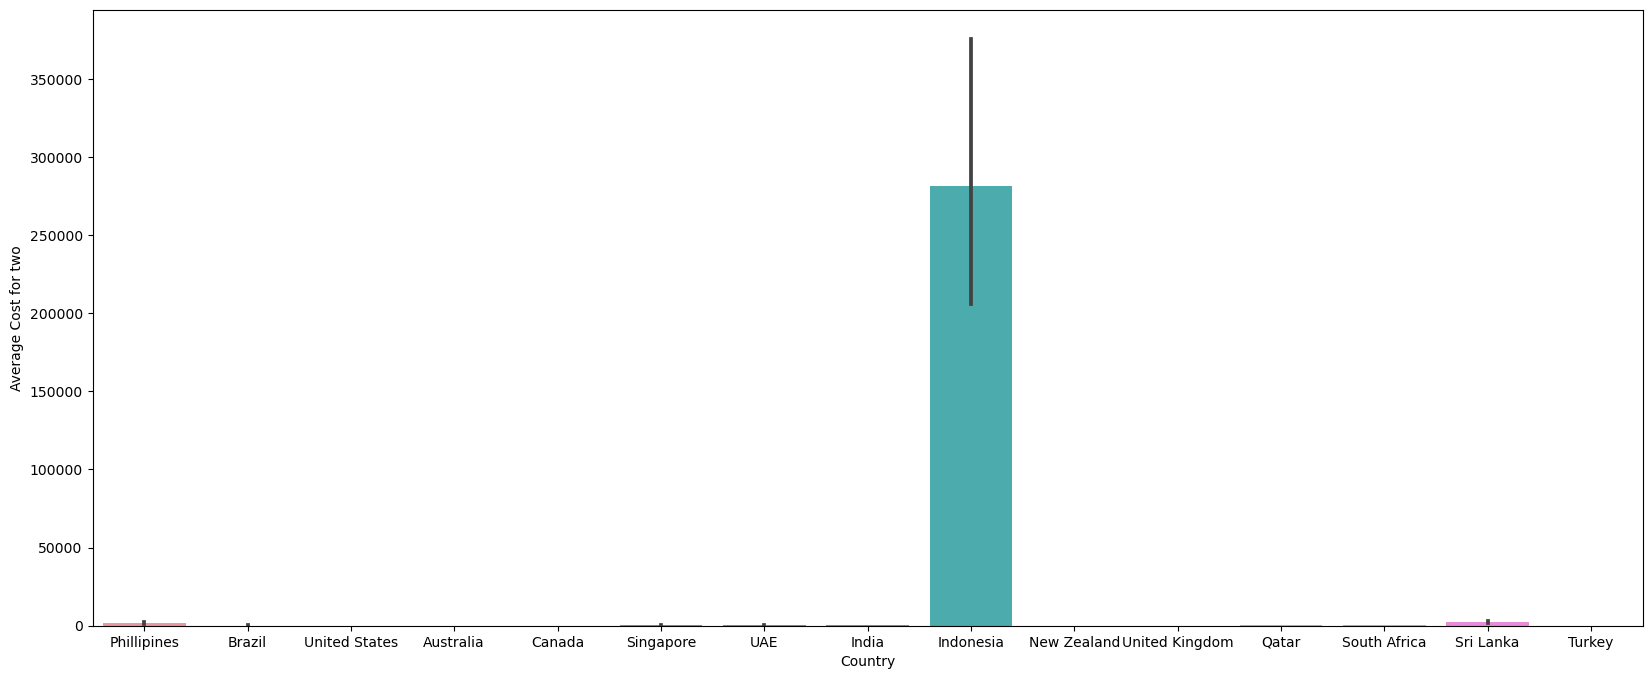

In [19]:
ax,fig=plt.subplots(1,1,figsize=(20,8))
sns.barplot(x=df['Country'],y=df['Average Cost for two'],)

<Axes: xlabel='Country', ylabel='Average Cost for two'>

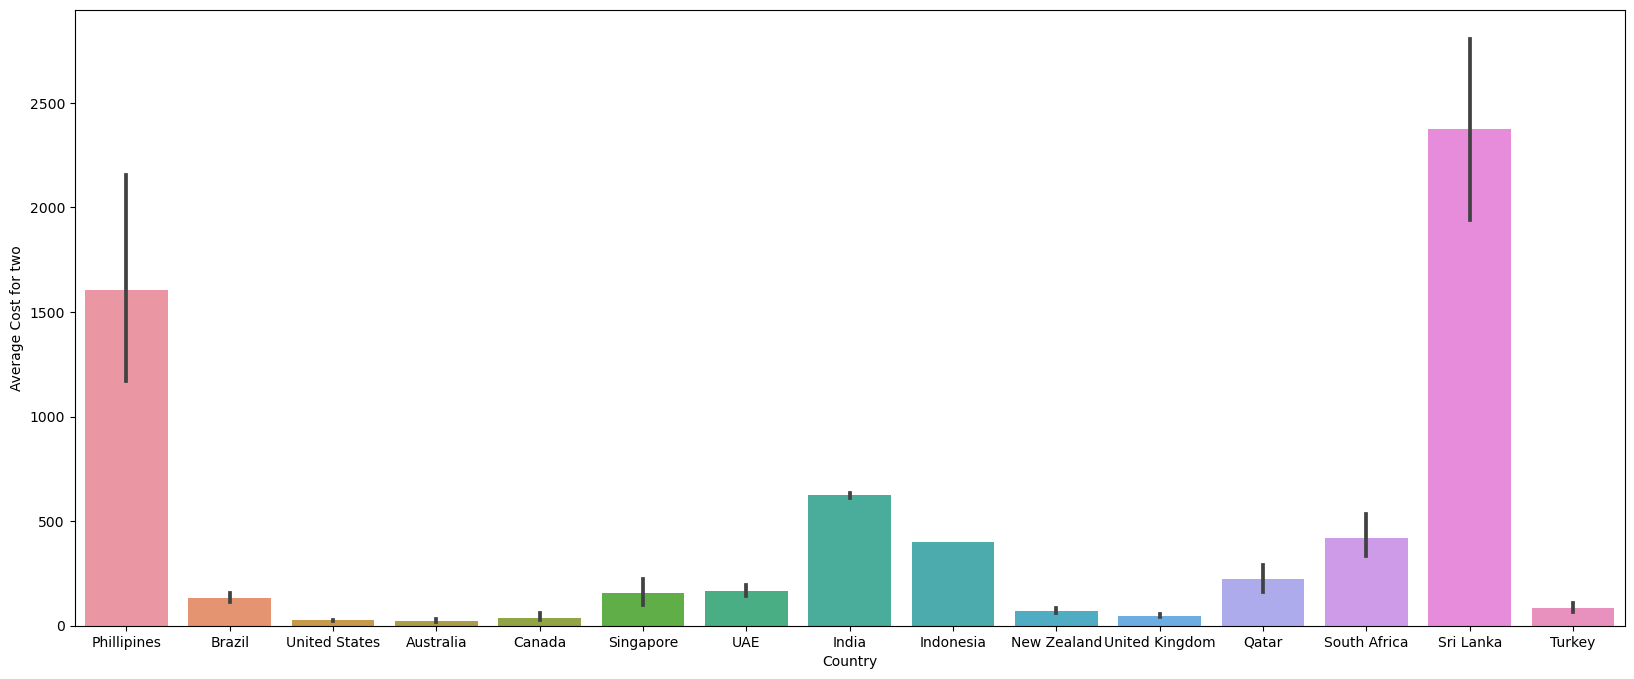

In [20]:
df.loc[df['Country']=='Indonesia','Average Cost for two']= df['Average Cost for two'].median()

ax,fig=plt.subplots(1,1,figsize=(20,8))
sns.barplot(x=df['Country'],y=df['Average Cost for two'],)

# Observation :-

### We can see that 'Indonesia' values were acting as outlier so we treated it to get a better overall view of data we can see that after treating the outlier, the maximum average cost for the table of two is off  Indonasia(considering orignal values),Sri Lanka , phillipines, India with U.S, Autralia & Canada being the lowest

# COUNTRY AND VOTES

<Axes: xlabel='Country', ylabel='Votes'>

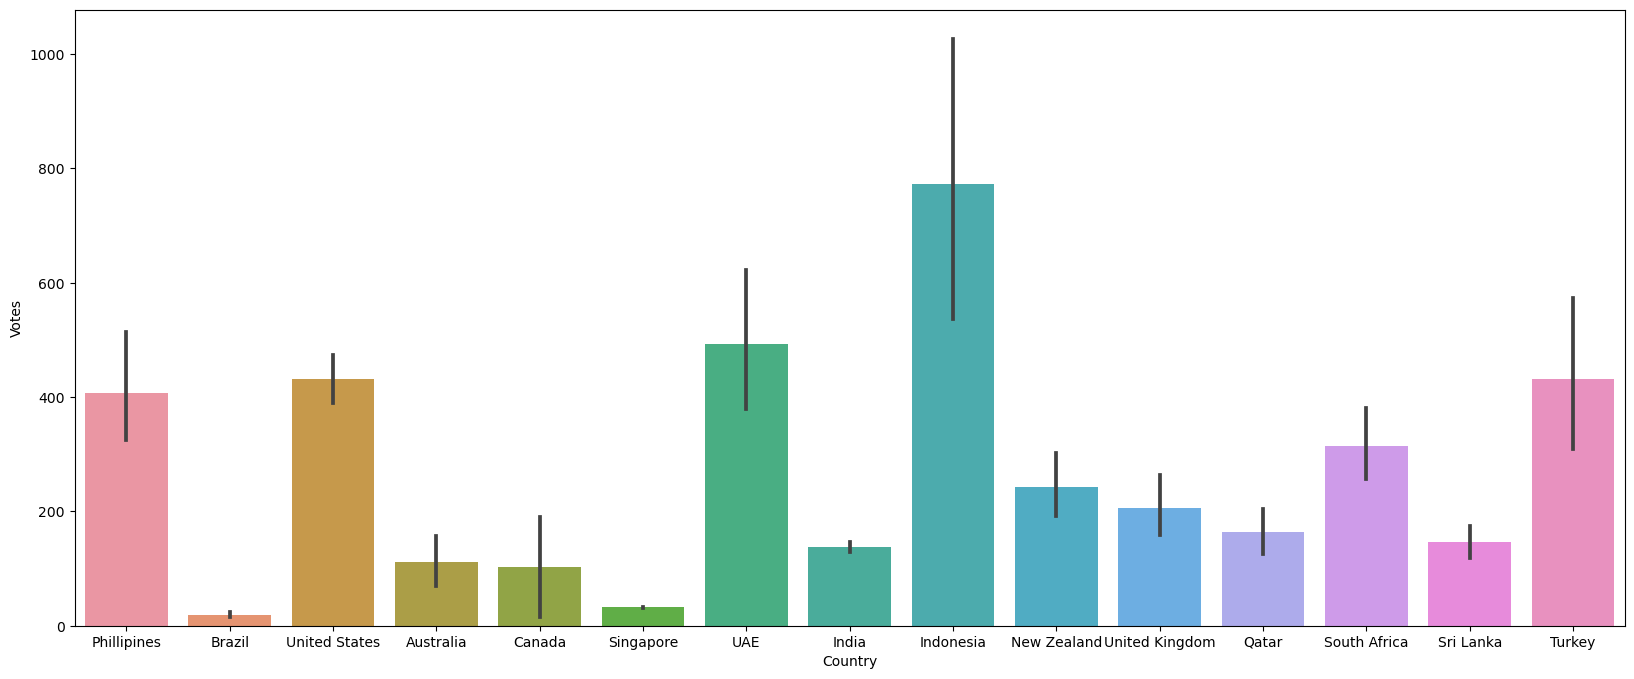

In [21]:
ax,fig=plt.subplots(1,1,figsize=(20,8))
sns.barplot(x=df['Country'],y=df['Votes'],)

# obsertvation:-

###     The countries with maximum no. of votes are Indonesia, UAE, philipines, United States with brazil and singapore being the lowest

# COUNTRY AND AGGREGATE RATING

In [22]:
df1=df.groupby(['Aggregate rating','Country']).size().reset_index()

<Axes: xlabel='Country', ylabel='Aggregate rating'>

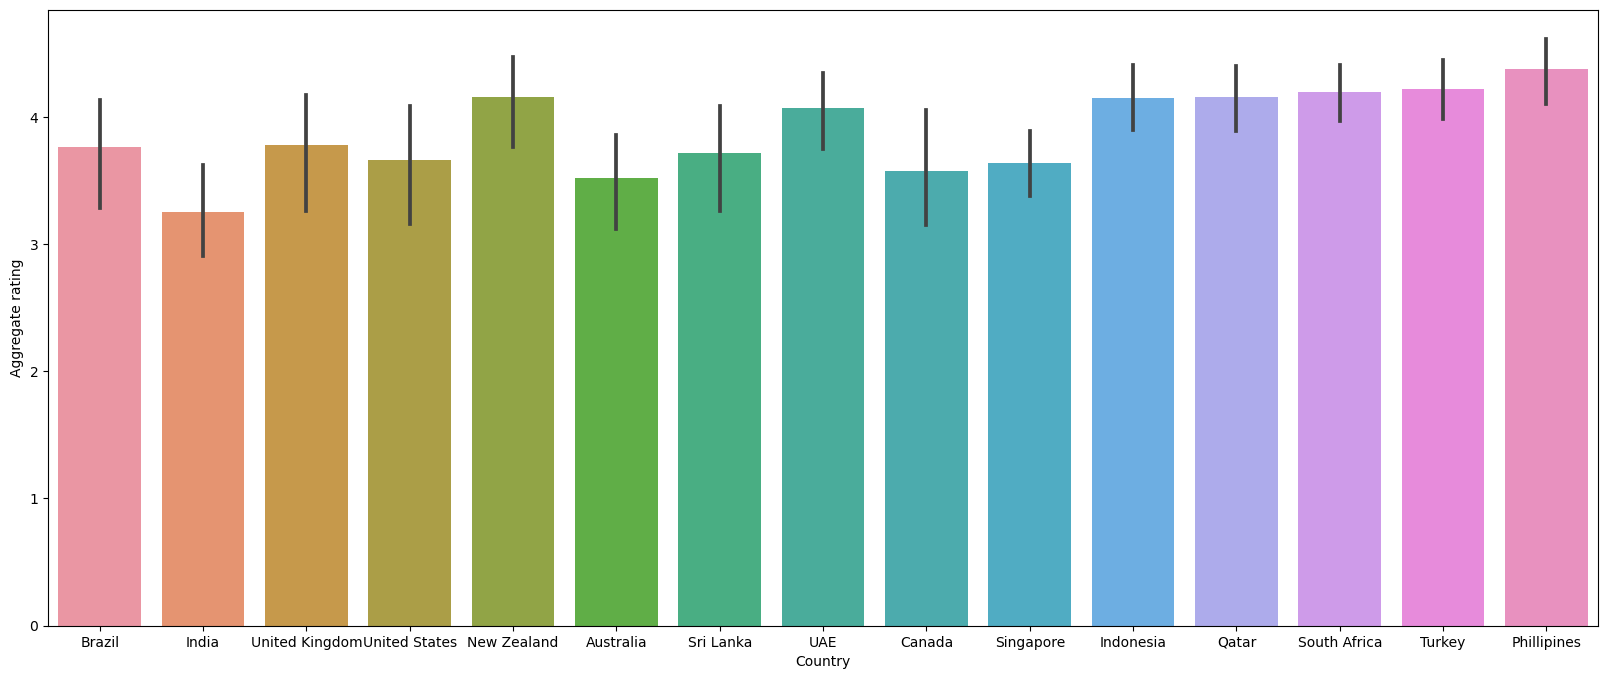

In [23]:
ax,fig=plt.subplots(1,1,figsize=(20,8))
sns.barplot(x=df1['Country'],y=df1['Aggregate rating'])

# Observation :-

###    The countries like Indonesia, New Zealand, Phillipines, Qatar, South                 Africa, Turkey, UAE are above the rating of 4.0 and rest of them are                 between 3.0-4.0


# AGGREGATE RATING

C:\Users\Raj Rohra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Aggregate rating', ylabel='Count'>

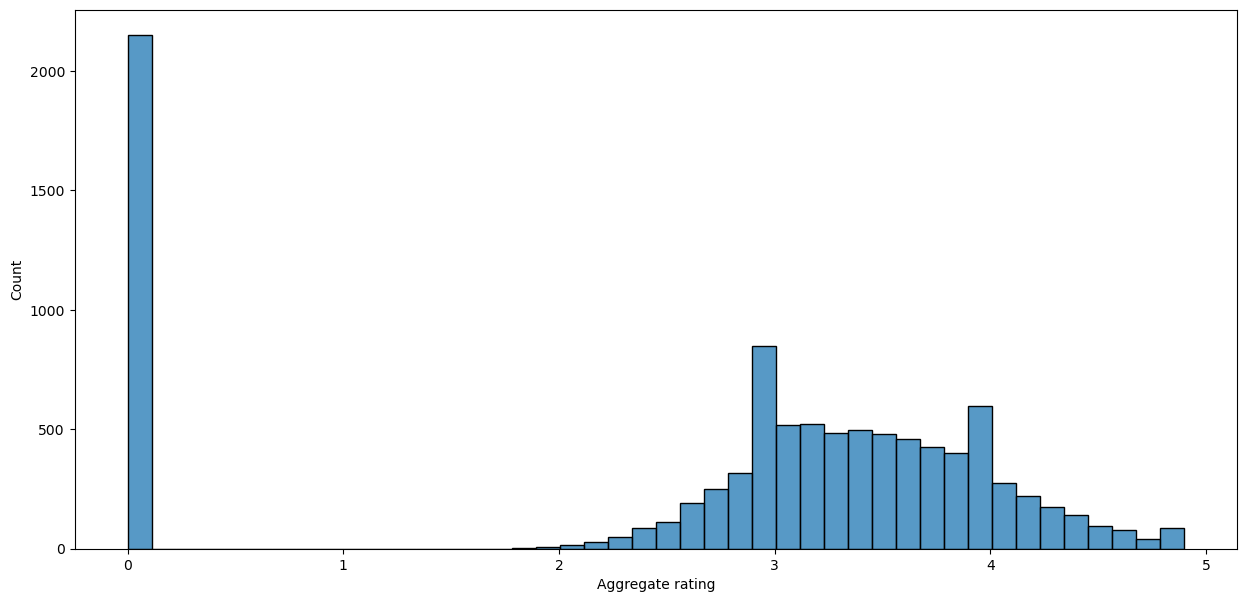

In [24]:
fig,ax=plt.subplots(1,1, figsize=(15,7))
sns.histplot(x=df['Aggregate rating'])

<function matplotlib.pyplot.show(close=None, block=None)>

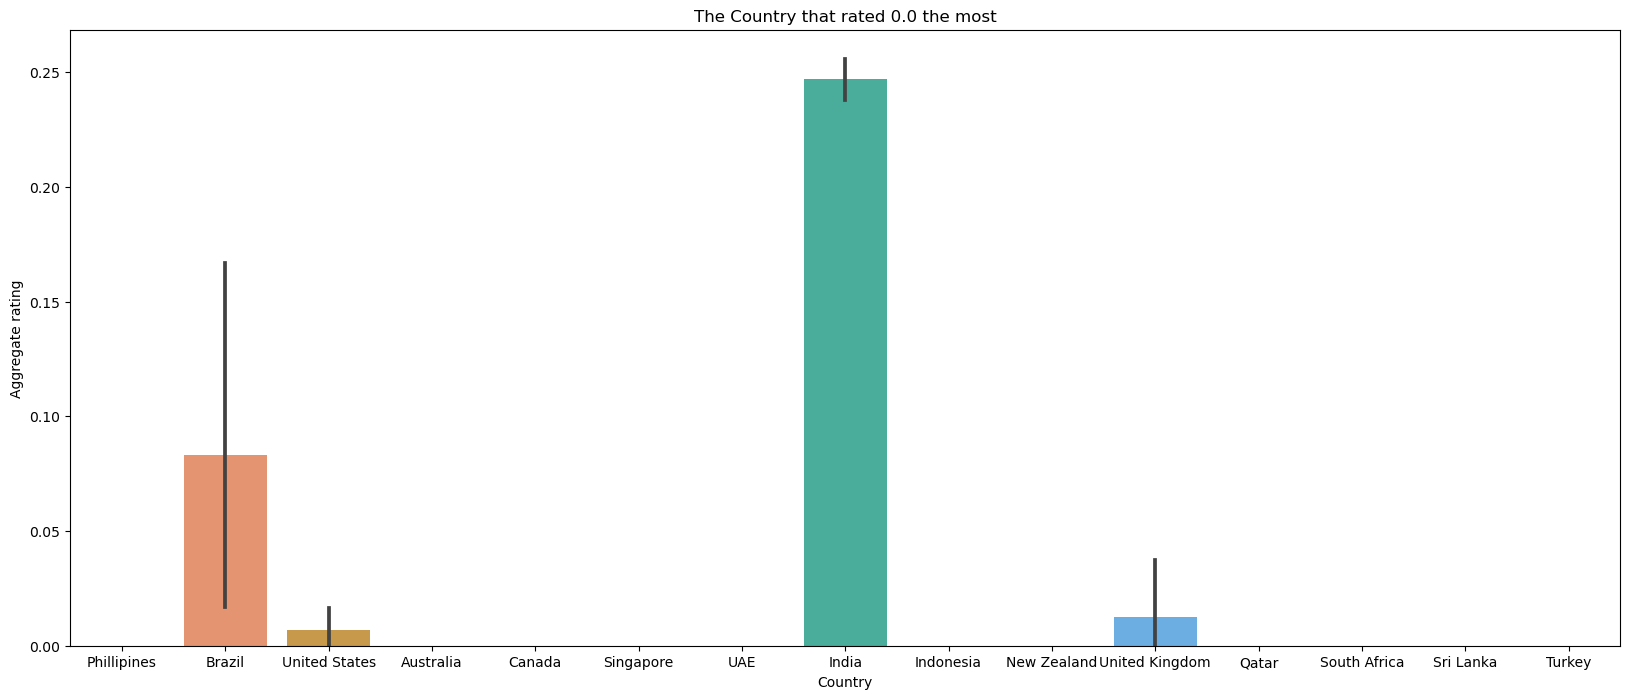

In [25]:
plt.figure(figsize=(20,8))
plt.title('The Country that rated 0.0 the most')
sns.barplot(x=df['Country'],y=df['Aggregate rating']==0.0)
plt.show

## Observation:-
### We can see that most of the people have Not Rated i.e 0.0 with india giving maximum contribution.When the Not Rated i.e 0.0 counts aren't considered the maximum no. rating lie between 3.0-3.6 and shows gaussian distribution i.e bell curve

## AGGREGARE RATING, VOTES & RATING TEXT

In [26]:
df1=df.groupby(['Aggregate rating','Votes','Rating text']).size().reset_index().rename(columns={0:'count'})
df1

,Aggregate rating,Votes,Rating text,count
0,0.0,0,Not rated,1094
1,0.0,1,Not rated,483
2,0.0,2,Not rated,327
3,0.0,3,Not rated,244
4,1.8,322,Poor,1
...,...,...,...,...
3702,4.9,2238,Excellent,1
3703,4.9,2620,Excellent,1
3704,4.9,3244,Excellent,1
3705,4.9,5434,Excellent,1


<Axes: xlabel='Aggregate rating', ylabel='Votes'>

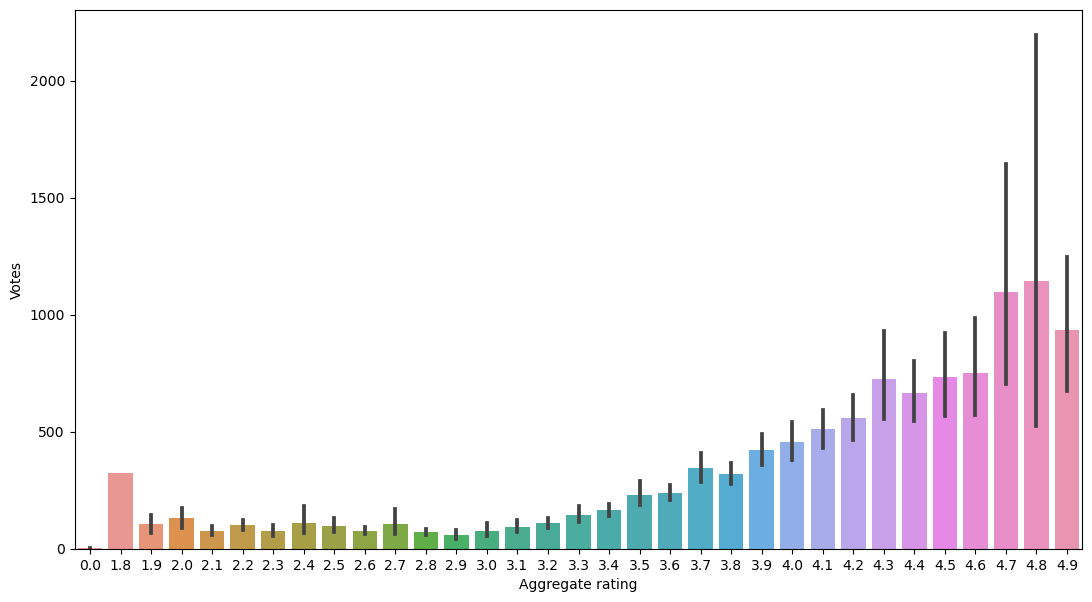

In [27]:
ax,fig=plt.subplots(1,1,figsize=(13,7))
sns.barplot(x=df1['Aggregate rating'],y=df1['Votes'])

<Axes: xlabel='Rating text', ylabel='Votes'>

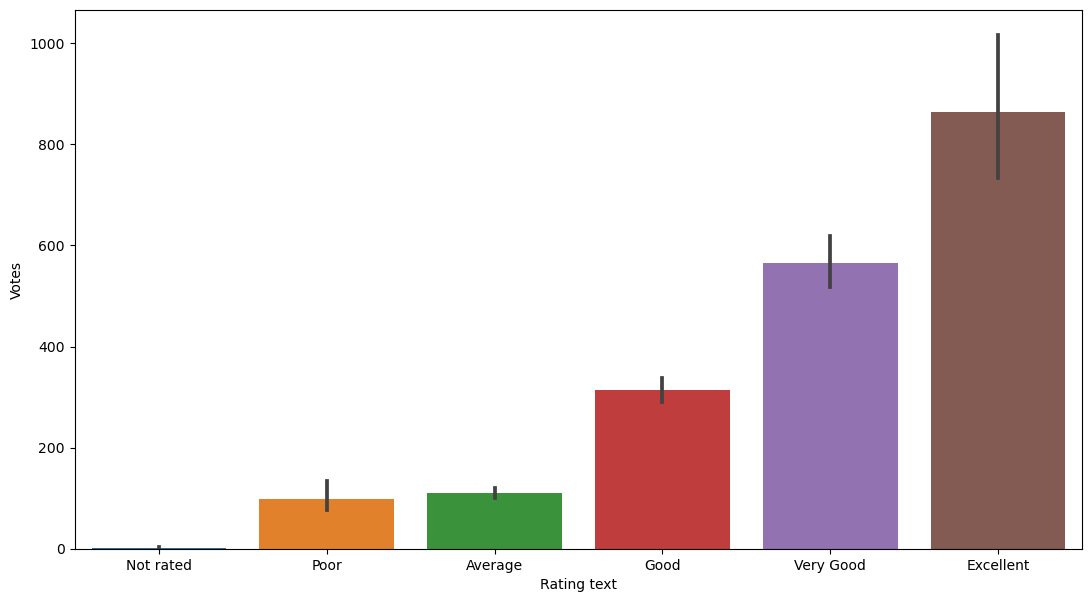

In [28]:
ax,fig=plt.subplots(1,1,figsize=(13,7))
sns.barplot(x=df1['Rating text'],y=df1['Votes'])

# Observation:-
### The higher the number of votes higher the rating goes. we can see that as the votes increases the probabilty of excellent rating also increases show positive correlation between Aggregate ratings and votes

In [29]:
df1=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'count'})
df1

,Aggregate rating,Rating color,Rating text,count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<Axes: xlabel='Rating text', ylabel='Aggregate rating'>

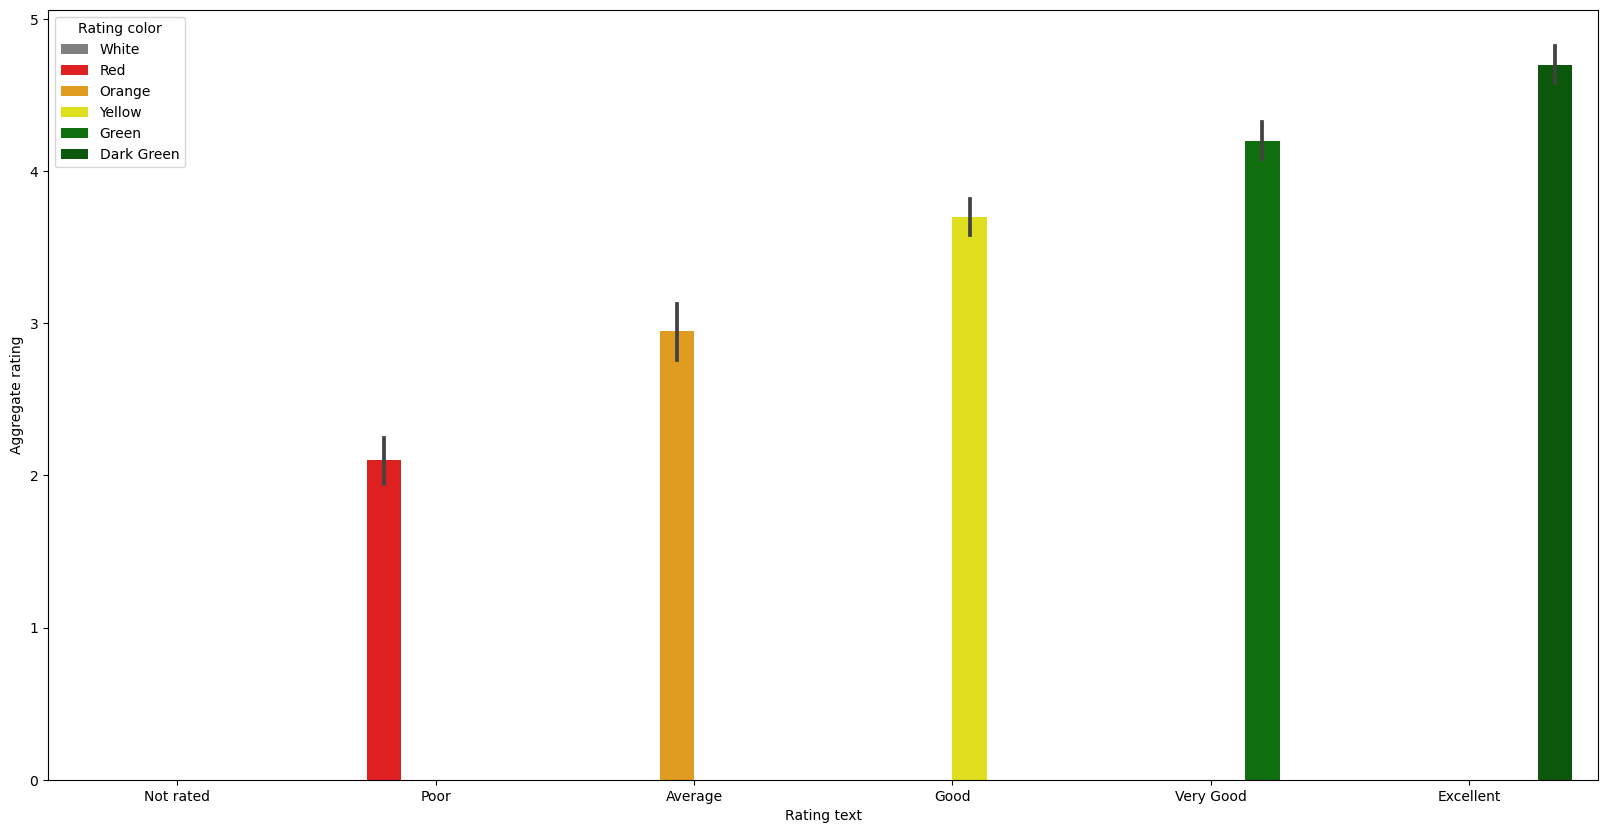

In [30]:
ax,fig=plt.subplots(1,1,figsize=(20,10))
sns.barplot(x='Rating text',y='Aggregate rating',hue='Rating color',data=df1,palette=['gray','red','orange','yellow','green','darkgreen'])

# Observation:-

### Aggregate rating greater than or equal to 4.5 are Excellent.Aggregate rating greater than or equal to 4.0 but less than 4.5 are Very    Good
### Aggregate rating greater than or equal to 3.5 but less than 4.0 are Good
### Aggregate rating greater than or equal to 2.5 but less than 3.5 are Average
### Aggregate rating less than 2.5 are Poor
### Aggregate rating equals to 0.0 means Not rated

# RESTAURANRS

In [31]:
restaurants= list(df["Restaurant Name"])
restaurants_counts=Counter(restaurants)

frequency_df = pd.DataFrame({'Restaurant':restaurants_counts.keys(),'Frequency':restaurants_counts.values()}).sort_values(by='Frequency', ascending=False)

top_5_restaurants=frequency_df.head(5)

frequency_df

,Restaurant,Frequency
872,Cafe Coffee Day,83
676,Domino's Pizza,79
642,Subway,63
822,Green Chick Chop,51
641,McDonald's,48
...,...,...
2665,The Town House Cafe,1
2664,The G.T. Road,1
2663,The Darzi Bar & Kitchen,1
2662,Smoke On Water,1


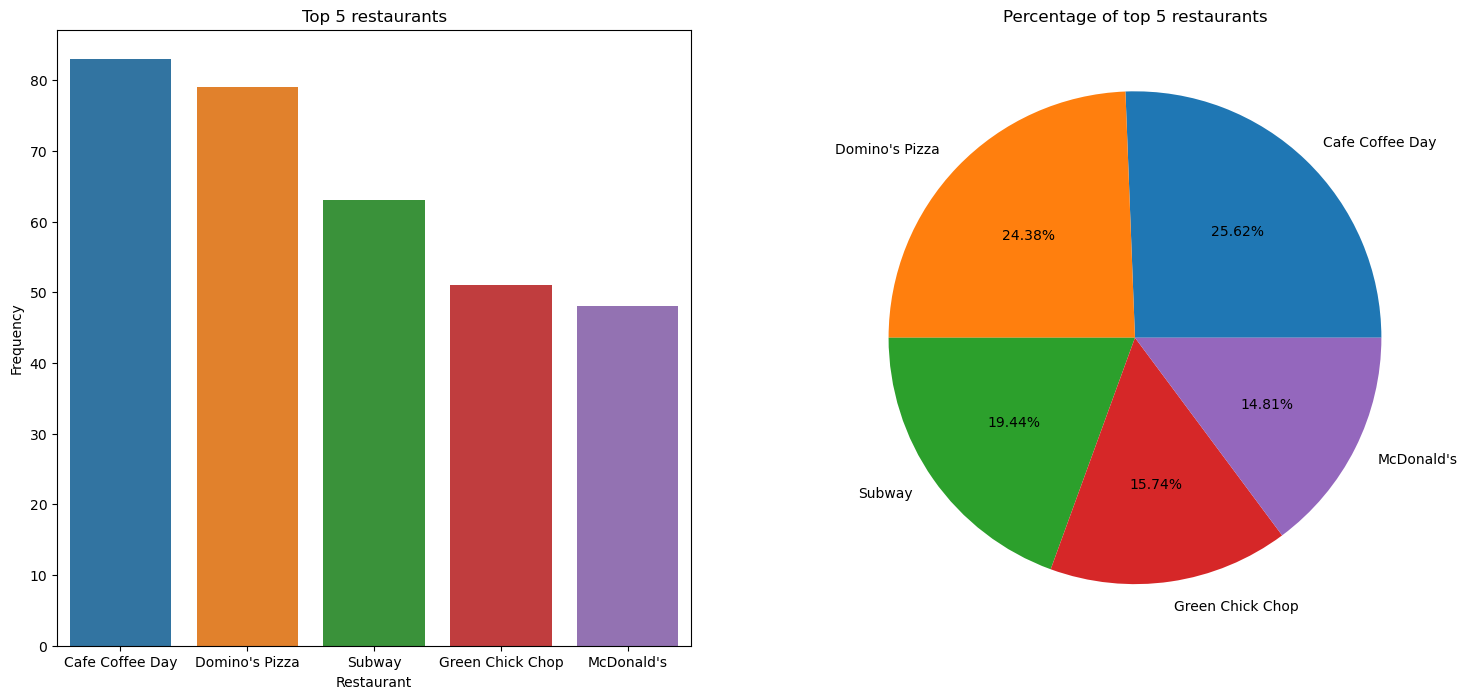

In [32]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
ax[0].set_title('Top 5 restaurants')
ax[1].set_title('Percentage of top 5 restaurants')
count=list(top_5_restaurants['Frequency'])
label=list(top_5_restaurants['Restaurant'])
plt.pie(count,labels=label,autopct='%0.2f%%')
sns.barplot(x=top_5_restaurants['Restaurant'],y=top_5_restaurants['Frequency'],ax=ax[0])
plt.show()

# Observation:-

###  The top 5 Reataurants with high no. of orders are Cafe Coffe day, Domino's Pizza, Subway, Green chick chop, McDonald's

In [33]:
df1=df.groupby(['Country','Restaurant Name']).size().reset_index()
Num=df1[df1['Country']=='India']['Restaurant Name'].nunique()
print('The total no.of Restaurants in India is',Num)

The total no.of Restaurants in India is 6604


In [34]:
df1=df.groupby(['Restaurant Name','Average Cost for two','Country']).size().reset_index().sort_values(by='Average Cost for two',ascending=False)
df1[:5]

,Restaurant Name,Average Cost for two,Country,0
5055,Orient Express - Taj Palace Hotel,8000,India,1
7383,Tian - Asian Cuisine Studio - ITC Maurya,7000,India,1
1102,Bukhara - ITC Maurya,6500,India,1
7286,The Spice Route - The Imperial,6000,India,1
7750,Wasabi by Morimoto - The Taj Mahal Hotel,6000,India,1


### We can see the top 5 Reataurants with highest average cost for two are Orient Express - Taj Palace Hotel	,Tian - Asian Cuisine Studio - ITC Maurya, Bukhara - ITC Maurya, The Spice Route - The Imperial,Wasabi by Morimoto - The Taj Mahal Hotel all of then being in India

In [35]:
df1=df.groupby(['Aggregate rating','Restaurant Name','Country','Average Cost for two']).size().reset_index()
df2=df1[(df1['Country']=='India')&(df1['Aggregate rating']>=4.5)]
df2['Average Cost for two'].mean()

1177.0642201834862

### Here we can see that in India in order to dine at an Excellent rating Restaurant the average cost of two is 1177 Rs.
### In this way we can find out the budget for every rating

In [36]:
df1=df.groupby(['Restaurant Name','Has Table booking','Has Online delivery','Country','Is delivering now']).size().reset_index()
df2=df1[df1['Country']=='India']
df2

,Restaurant Name,Has Table booking,Has Online delivery,Country,Is delivering now,0
0,Let's Burrrp,No,No,India,No,1
1,#45,No,No,India,No,1
2,#Dilliwaala6,No,No,India,No,1
3,#InstaFreeze,No,No,India,No,1
4,#OFF Campus,Yes,Yes,India,No,1
...,...,...,...,...,...,...
7732,hug!,No,Yes,India,No,1
7733,iGNiTE,No,Yes,India,No,1
7734,iKitchen,No,Yes,India,No,1
7736,t Lounge by Dilmah,No,No,India,No,1


<Axes: xlabel='Has Table booking', ylabel='count'>

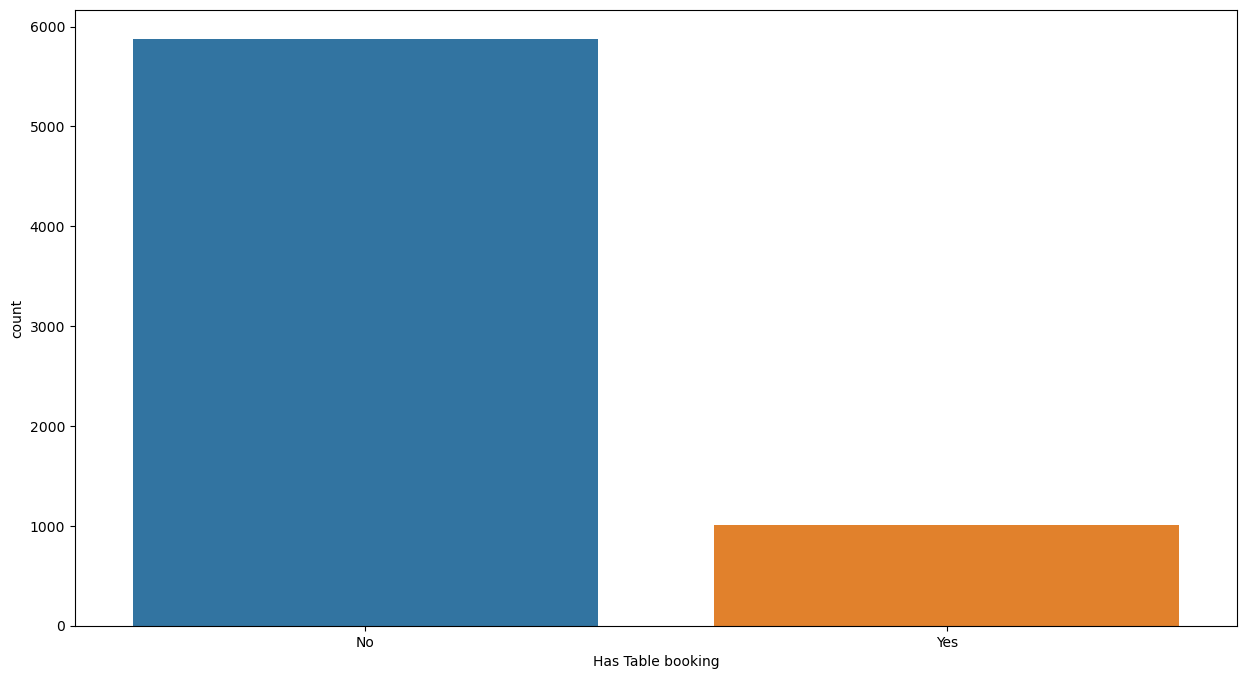

In [37]:
ax,fig=plt.subplots(1,1,figsize=(15,8))
sns.countplot(x=df2['Has Table booking'])

### Here we can see that Most of the reraurants don't have the facility of table booking

<Axes: xlabel='Has Online delivery', ylabel='count'>

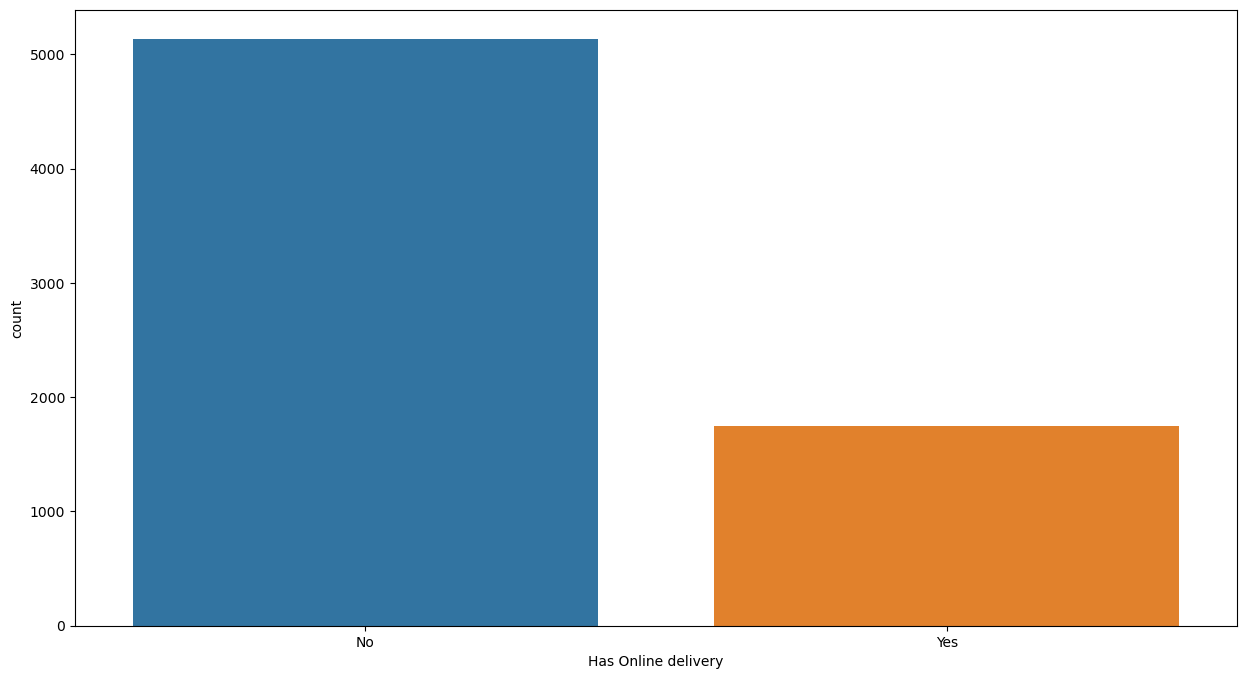

In [38]:
ax,fig=plt.subplots(1,1,figsize=(15,8))
sns.countplot(x=df2['Has Online delivery'])

### Here we can see that most of the Restaurants don't have the facility of Online Delivey

In [39]:
cuisines_list= list(df["Cuisines"])

separated_cuisines = [cuisine.split(',') for cuisine in cuisines_list]

single_cuisines=[]
for i in separated_cuisines:
    for j in range(len(i)):
        single_cuisines.append(i[j].strip())

cuisine_counts = Counter(single_cuisines)

cuisine_frequency_df = pd.DataFrame({'Cuisine':cuisine_counts.keys(),'Frequency':cuisine_counts.values()}).sort_values(by='Frequency', ascending=False)

top_5_cuisines=cuisine_frequency_df.head(5)




cities= list(df["City"])
city_counts=Counter(cities)

city_frequency_df = pd.DataFrame({'City':city_counts.keys(),'Frequency':city_counts.values()}).sort_values(by='Frequency', ascending=False)

top_3_cities=city_frequency_df.head(3)

# CUISINES

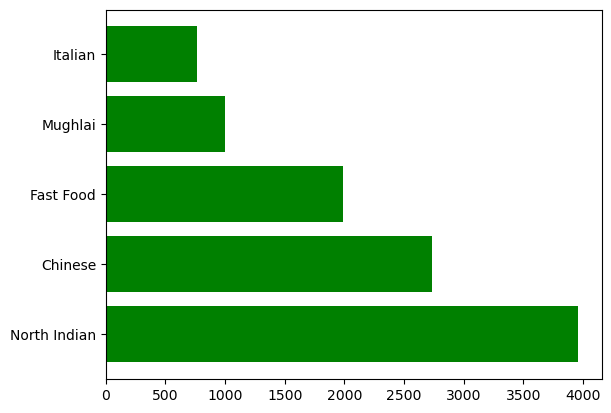

In [40]:
plt.barh(top_5_cuisines.Cuisine, top_5_cuisines.Frequency,color="green");

### Cuisnes with highest frequency are North Indian, Chinese, Fast Food, Mughlai, Italian

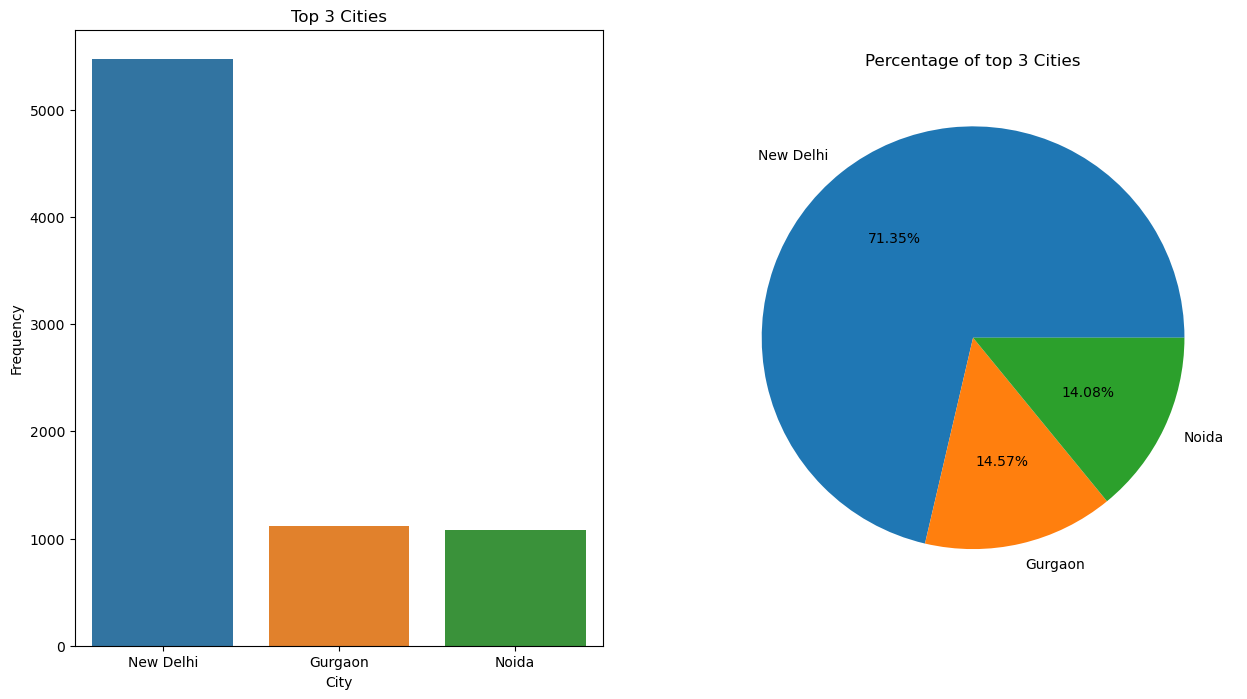

In [41]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
ax[0].set_title('Top 3 Cities')
ax[1].set_title('Percentage of top 3 Cities')
count=top_3_cities['Frequency']
label=top_3_cities['City']
plt.pie(count,labels=label,autopct='%0.2f%%')
sns.barplot(x=top_3_cities['City'],y=top_3_cities['Frequency'],ax=ax[0])
plt.show()

# The Cities with most frequent orders are New Delhi, Gurgaon, Noida

In [42]:
df1=df.groupby(['Average Cost for two','Cuisines','City']).size().reset_index().rename(columns={0:'count'}).sort_values(by='Average Cost for two',ascending=False)
df1[:5]

,Average Cost for two,Cuisines,City,count
4816,8000,European,New Delhi,1
4815,7000,"Asian, Japanese, Korean, Thai, Chinese",New Delhi,1
4814,6500,North Indian,New Delhi,1
4813,6000,"North Indian, Chinese, South Indian, Italian",New Delhi,1
4812,6000,"Malaysian, Thai, Kerala, Vietnamese, Sri Lankan",New Delhi,1


### we can see the cuisines with the highest average cost for two along with their city all off them being in India

In [43]:
df1=df.groupby(['Aggregate rating','Cuisines','City']).size().reset_index().rename(columns={0:'count'}).sort_values(by='Aggregate rating',ascending=False)
df1[:5]

,Aggregate rating,Cuisines,City,count
5209,4.9,World Cuisine,Ankara,1
5168,4.9,"Burger, Bar Food, Steak",Pensacola,1
5180,4.9,French,Pretoria,1
5179,4.9,"Filipino, Mexican",Pasig City,1
5178,4.9,Fast Food,Bhopal,1


### We can see the cuisines with the highest ratings along with their city

In [44]:
df1=df.groupby(['Aggregate rating','Cuisines','Country','City']).size().reset_index().rename(columns={0:'count'}).sort_values(by='Aggregate rating',ascending=False)
df1[df1['Country']=='India'][:5]

,Aggregate rating,Cuisines,Country,City,count
5178,4.9,Fast Food,India,Bhopal,1
5170,4.9,"Cafe, North Indian, Chinese",India,Agra,1
5182,4.9,Ice Cream,India,New Delhi,1
5163,4.9,"Bakery, Desserts",India,Coimbatore,1
5177,4.9,"European, Mediterranean, North Indian",India,Hyderabad,2


### we cann see the cuisines with the highest ratings in India

In [45]:
df1=df.groupby(['City','Cuisines','Country']).size().reset_index().rename(columns={0:'count'})
df2=df1[(df1['Country']=='India')]
df2

,City,Cuisines,Country,count
17,Agra,"Cafe, Italian, Mexican, North Indian, Continental",India,1
18,Agra,"Cafe, North Indian, Chinese",India,1
19,Agra,"Chinese, Italian, Continental, North Indian",India,1
20,Agra,"Italian, Pizza",India,1
21,Agra,Mughlai,India,1
...,...,...,...,...
2970,Vizag,"North Indian, Biryani",India,1
2971,Vizag,"North Indian, Chinese, Mediterranean",India,1
2972,Vizag,"Pizza, Fast Food",India,2
2973,Vizag,"South Indian, Chinese, Continental, Italian, N...",India,1


<Axes: xlabel='City', ylabel='count'>

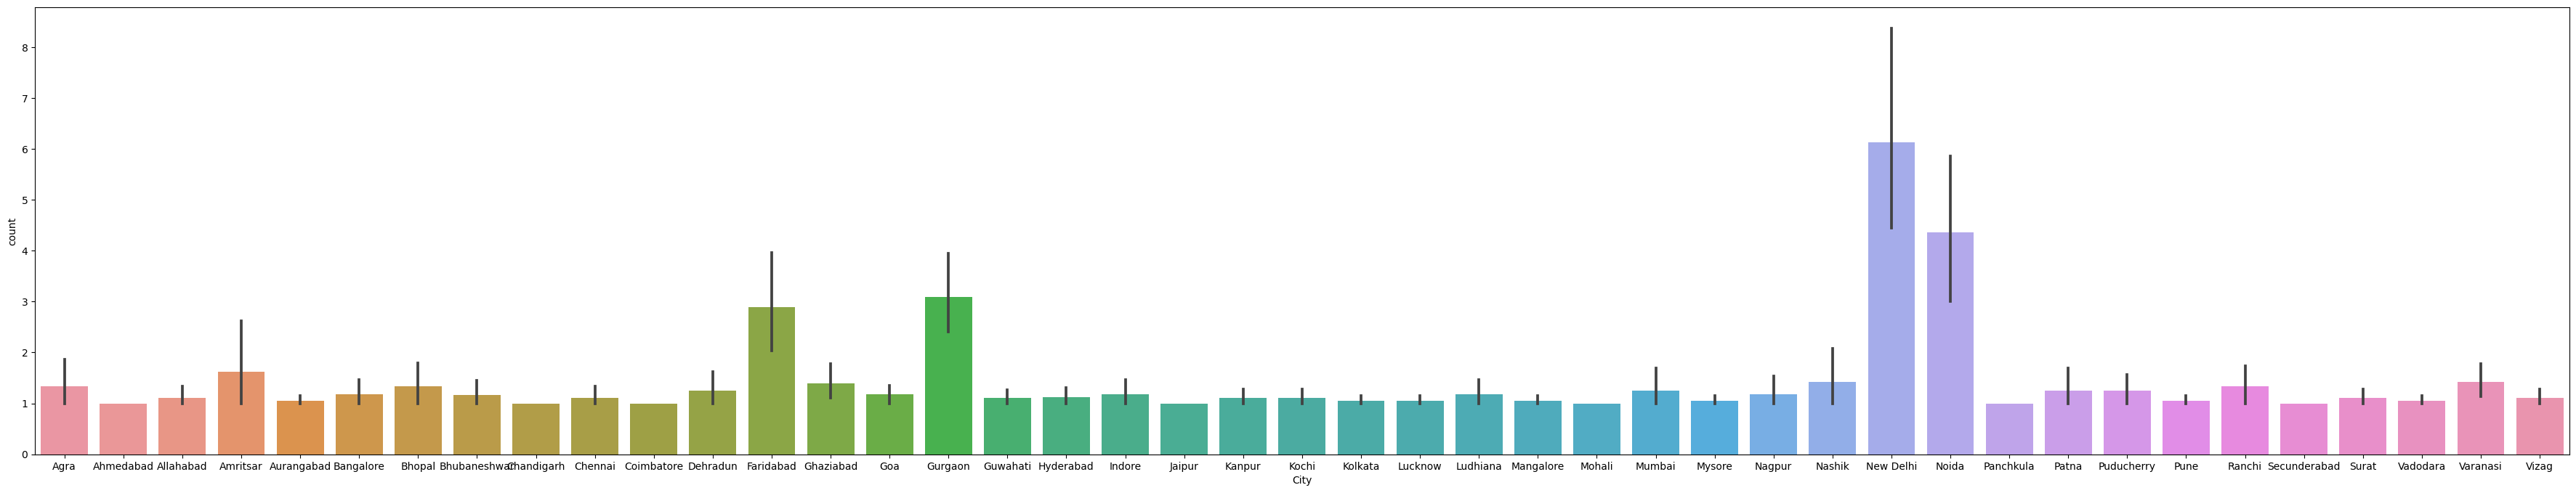

In [46]:
ax,fig=plt.subplots(1,1,figsize=(45,8))
sns.barplot(x='City',y='count',data=df2)

# Observation:-

### Here we can see that in country india the most orderd cuisines are from Cities like New delhi,Noida,Gurgaon and so on


# Conclusion

#### The top three countries with the highest frequency of orders are India, the United States, and the United Kingdom. 
#### After treating outliers, Indonesia had the highest average cost for two, while Sri Lanka, the Philippines, India, & U.S, Australia and Canada had the lowest.
#### Indonesia, UAE, the Philippines, the U.S received the most votes,with Brazil and Singapore having the fewest. 
####  The countries like Indonesia, New Zealand, Phillipines, Qatar, South                 Africa, Turkey, UAE are above the rating of 4.0 and rest of them are                 between 3.0-4.0

#### Most ratings fell between 3.0 and 3.6, forming a Gaussian distribution. Notably, India contributed the most "Not Rated" (0.0) entries. 
#### There's a positive correlation between aggregate ratings and votes, indicating higher votes correlate with higher ratings. 
#### The top five restaurants by orders include Cafe Coffee Day, Domino's Pizza, Subway, Green Chick Chop, and McDonald's.
#### The highest average cost for two is in India, with Orient Express - Taj Palace Hotel, Tian - Asian Cuisine Studio - ITC Maurya, Bukhara - ITC Maurya, The Spice Route - The Imperial, and Wasabi by Morimoto - The Taj Mahal Hotel leading. In India, an Excellent-rated restaurant costs an average of 1177 Rs. Most restaurants don't offer table booking, and online delivery is not widely available. 
#### Popular cuisines are North Indian, Chinese, Fast Food, Mughlai, and Italian. 
#### Cities with frequent orders of cuisines include New Delhi, Gurgaon, and Noida.